In [1]:
using ApproxFun
using PyPlot

function columns(M)
    return (col = view(M,:,i) for i in 1:size(M,2))
end

  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:32
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in depwarn(::String, ::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in @linux(::Any, ::Any) at ./deprecated.jl:484
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in eval(::Module, ::Any) at ./boot.jl:234
 in eval(::Module, ::Any) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in require(::Symbol) at ./loading.jl:415
 in require(::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in include_string(::String, ::String

columns (generic function with 1 method)

In [2]:
jac_row2(t, A1, A2, tau1, tau2) = [exp(-t/tau1), exp(-t/tau2), A1*t/tau1^2 * exp(-t/tau1), A2*t/tau2^2 * exp(-t/tau2)]
jac_row(t, A1, tau1) = [exp(-t/tau1), A1*t/tau1^2 * exp(-t/tau1)]
jac(f, args...) = hcat(f.(args...)...)'

jac (generic function with 1 method)

In [3]:
t = 0:0.01:20
A1 = jac(jac_row2, t, 1, 0.8, 0.4, 3)

2001×4 Array{Float64,2}:
 1.0          1.0         0.0          0.0        
 0.97531      0.996672    0.0609569    0.000885931
 0.951229     0.993356    0.118904     0.00176597 
 0.927743     0.99005     0.173952     0.00264013 
 0.904837     0.986755    0.226209     0.00350846 
 0.882497     0.983471    0.27578      0.00437098 
 0.860708     0.980199    0.322765     0.00522773 
 0.839457     0.976937    0.367262     0.00607872 
 0.818731     0.973686    0.409365     0.00692399 
 0.798516     0.970446    0.449165     0.00776356 
 0.778801     0.967216    0.48675      0.00859748 
 0.759572     0.963997    0.522206     0.00942575 
 0.740818     0.960789    0.555614     0.0102484  
 ⋮                                                
 2.53926e-22  0.00132016  3.15662e-20  0.00233405 
 2.47656e-22  0.00131577  3.08023e-20  0.00232745 
 2.41542e-22  0.00131139  3.00568e-20  0.00232087 
 2.35578e-22  0.00130703  2.93295e-20  0.00231431 
 2.29762e-22  0.00130268  2.86197e-20  0.00230777 
 2.240

In [4]:
t2 = 0:0.01:5
A2 = jac(jac_row, t2, 1.0, 1.0)

501×2 Array{Float64,2}:
 1.0         0.0      
 0.99005     0.0099005
 0.980199    0.019604 
 0.970446    0.0291134
 0.960789    0.0384316
 0.951229    0.0475615
 0.941765    0.0565059
 0.932394    0.0652676
 0.923116    0.0738493
 0.913931    0.0822538
 0.904837    0.0904837
 0.895834    0.0985418
 0.88692     0.10643  
 ⋮                    
 0.00752142  0.0367798
 0.00744658  0.0364883
 0.00737249  0.0361989
 0.00729913  0.0359117
 0.0072265   0.0356267
 0.0071546   0.0353437
 0.00708341  0.0350629
 0.00701293  0.0347841
 0.00694315  0.0345074
 0.00687406  0.0342328
 0.00680566  0.0339603
 0.00673795  0.0336897

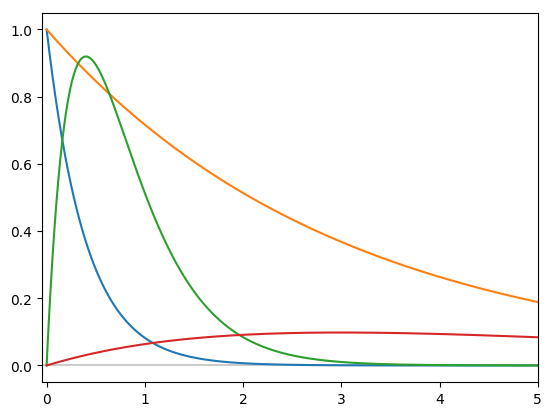

PyObject <matplotlib.lines.Line2D object at 0x3206e5f50>

In [6]:
for col in columns(A1)
    plot(t, col)
end
xlim(-0.05, 5)
axhline(color="0.8", zorder=0)

In [7]:
u, d, v = svd(A1)
u2, d2, v2 = svd(A2);

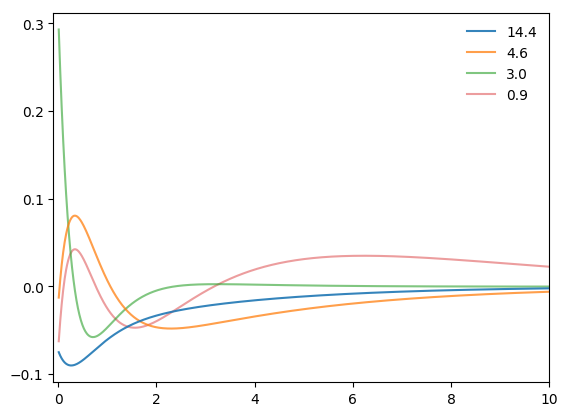

(-0.1,10)

In [15]:
for (col, sing_val, alpha) in zip(columns(u), (val for val in d), 0.9:-0.15:0.45)
        plot(t[2:end], col[2:end], label=round(sing_val,1), alpha=alpha, zorder=alpha)
end
legend()
xlim(-0.1, 10)

- "Double exponential fitting is poorly conditioned."
- The slower time constant, $\tau_2$ is almost completely determined by the coefficient of the smallest singular value. Noise will enter into the solution in equal amounts in each singular value, so this coefficient will be most affected by noise.

In [14]:
v

4×4 Array{Float64,2}:
 -0.225603    0.382011   0.873122    0.202063
 -0.836761   -0.47598    0.0534562  -0.265361
 -0.489687    0.707076  -0.477467    0.179654
 -0.0956102  -0.357147  -0.0826195   0.925461

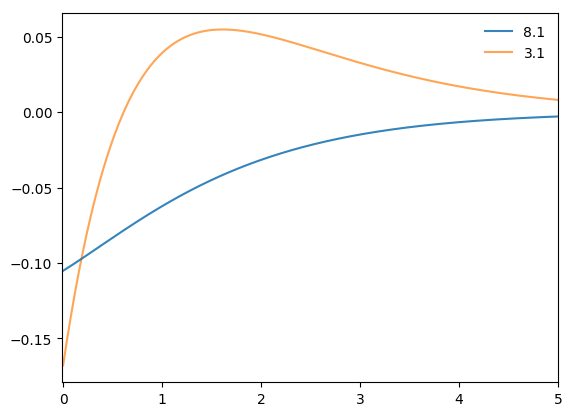

(-0.01,5)

In [12]:
for (col, sing_val, alpha) in zip(columns(u2), (val for val in d2), 0.9:-0.2:0.3)
    plot(t2, col, label=round(sing_val,1), alpha=alpha, zorder=alpha)
end
legend()
xlim(-0.01, 5)

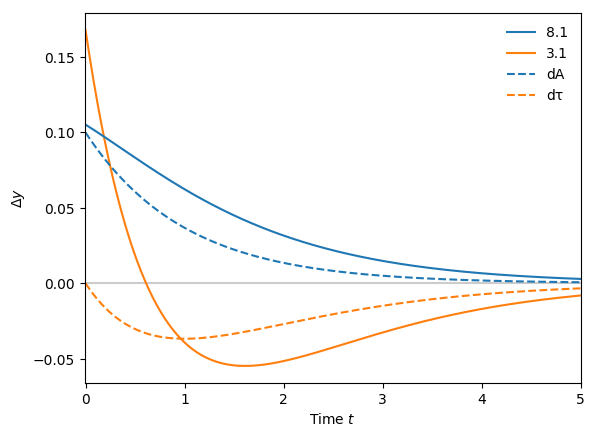

PyObject <matplotlib.text.Text object at 0x31d3c1b10>

In [31]:
lines = []
for (col, sing_val, alpha) in zip(columns(u2), (val for val in d2), (0.9:-0.2:0.3))
        push!(lines, plot(t2, -col, label=round(sing_val,1), zorder=alpha)[1])
end
xlim(-0.01, 5)
A3 = copy(A2)/10
A3[:, 2] = A3[:, 2]*-1
for (col, name, line) in zip(columns(A3), ["dA", "dτ"], lines)
        plot(t2, col, label=name, color=line[:get_color](), linestyle="--")
end
legend()
axhline(color="0.8", zorder=0)
ylabel("\$\\Delta y\$")
xlabel("Time \$t\$")

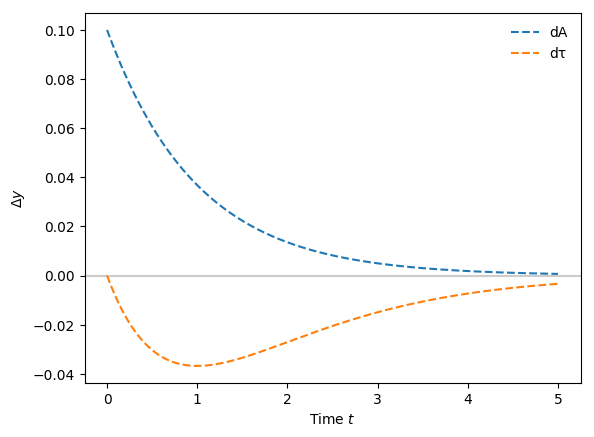

PyObject <matplotlib.text.Text object at 0x32192e610>

In [32]:
for (col, name, line) in zip(columns(A3), ["dA", "dτ"], lines)
        plot(t2, col, label=name, color=line[:get_color](), linestyle="--")
end
legend()
axhline(color="0.8", zorder=0)
ylabel("\$\\Delta y\$")
xlabel("Time \$t\$")

The above plot answers the question,

### How do changes in $A, \tau$ affect y?

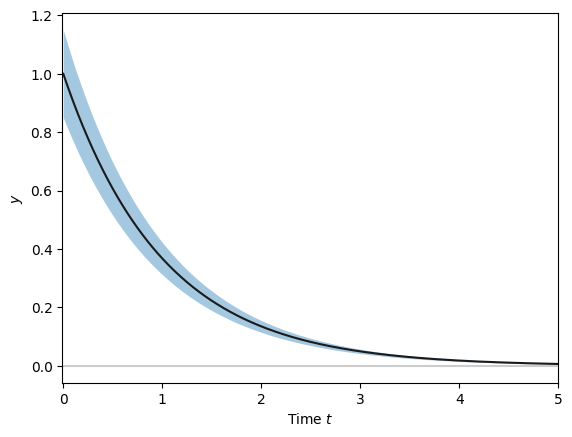

PyObject <matplotlib.text.Text object at 0x3265d37d0>

In [64]:
axhline(color="0.8")
yp = 1.15 * exp(-t2)
ym = 0.85 * exp(-t2)
fill_between(t2, ym, yp, alpha=0.4)
plot(t2, exp(-t2), color="0.1")
xlim(-0.01, 5)
ylabel("\$y\$")
xlabel("Time \$t\$")
# line = plot(t2, yp)[1]
# plot(t2, ym, color=line[:get_color]())


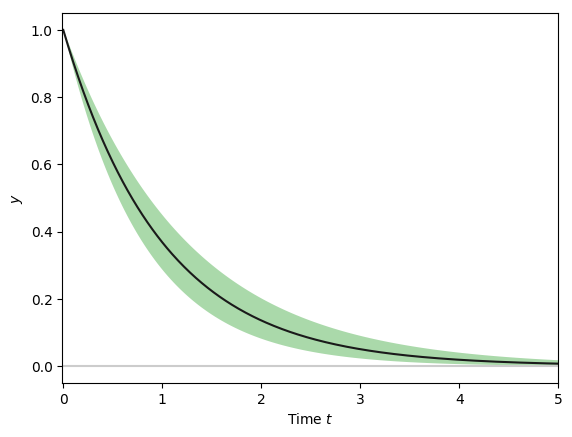

PyObject <matplotlib.text.Text object at 0x32722c850>

In [82]:
fig, ax = subplots()
axhline(color="0.8")
yp = 1 * exp(-t2 ./ 1.25)
ym = 1 * exp(-t2 .* 1.25)
ax[:_get_lines][:prop_cycler][:next]()["color"]
ax[:_get_lines][:prop_cycler][:next]()["color"]
fill_between(t2, ym, yp, alpha=0.4, color = ax[:_get_lines][:prop_cycler][:next]()["color"])
plot(t2, exp(-t2), color="0.1")
xlim(-0.01, 5)
ylabel("\$y\$")
xlabel("Time \$t\$")

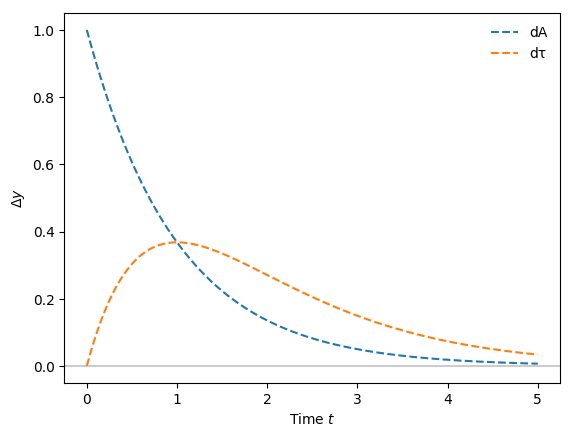

PyObject <matplotlib.text.Text object at 0x327514750>

In [83]:
for (col, name, line) in zip(columns(A2), ["dA", "dτ"], lines)
        plot(t2, col, label=name, color=line[:get_color](), linestyle="--")
end
legend()
axhline(color="0.8", zorder=0)
ylabel("\$\\Delta y\$")
xlabel("Time \$t\$")

In [87]:
A2p = pinv(A2);

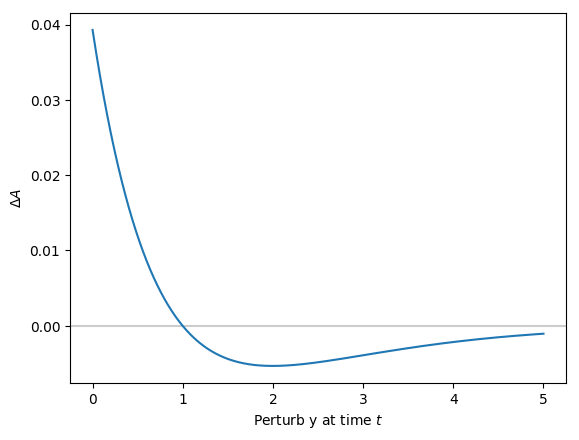

PyObject <matplotlib.text.Text object at 0x3282cda10>

In [95]:
plot(t2, A2p[1, :])
axhline(color="0.8", zorder=0)
ylabel("\$\\Delta A\$")
xlabel("Perturb y at time \$t\$")

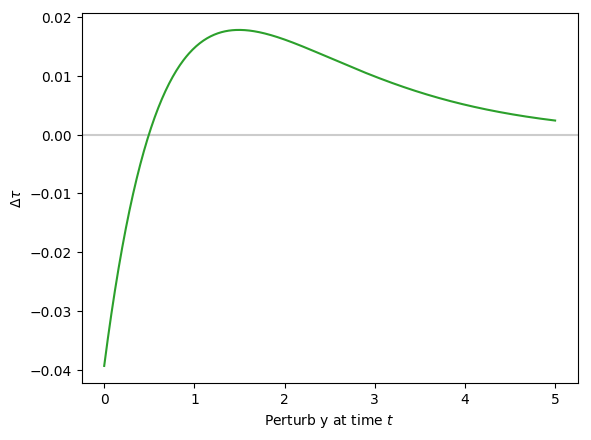

PyObject <matplotlib.text.Text object at 0x3289168d0>

In [98]:
fig, ax = subplots()
ax[:_get_lines][:prop_cycler][:next]()["color"]
ax[:_get_lines][:prop_cycler][:next]()["color"]
plot(t2, A2p[2, :])
axhline(color="0.8", zorder=0)
ylabel("\$\\Delta \\tau \$")
xlabel("Perturb y at time \$t\$")

### Likewise, how do changes in y affect $A, \tau$?

These questions are much easier if we have orthogonal columns, because then, we can just calculate,